In [ ]:
import requests
import pandas as pd

In [ ]:
!pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 9.5 MB/s eta 0:00:00


In [ ]:
from datetime import datetime, timedelta

BASE_URL = "https://api.kraken.com/0/public/OHLC"

pairs = ['TRUMPUSD', 'WIFUSD', 'CQTUSD', 'XCNUSD', 'SOLUSD', 'USDCUSD', 'PNUTUSD', 'TURBOUSD', 'SUSHIUSD', 'TAOUSD', 'SUIUSD', 'LINKUSD']
now = datetime.now()
time_24_hours_ago = int((now - timedelta(hours=24)).timestamp())
time_18_hours_ago = int((now - timedelta(hours=18)).timestamp())
time_12_hours_ago = int((now - timedelta(hours=12)).timestamp())
time_6_hours_ago = int((now - timedelta(hours=6)).timestamp())
time_now = int(now.timestamp())
interval = 60

def get_crypto_prices(pair, interval, since):
      params = {
        'pair': pair,
        'interval': interval,
        'since': since
    }
      response = requests.get(BASE_URL, params=params)
      if response.status_code == 200:
        return response.json()['result'][pair]
      else:
        print(f"Помилка отримання даних для {pair}. Статус: {response.status_code}")
        return []

price_changes = {}

for pair in pairs:
    data_24h = get_crypto_prices(pair, interval, time_24_hours_ago)
    data_18h = get_crypto_prices(pair, interval, time_18_hours_ago)
    data_12h = get_crypto_prices(pair, interval, time_12_hours_ago)
    data_6h = get_crypto_prices(pair, interval, time_6_hours_ago)
    data_now = get_crypto_prices(pair, interval, time_now)

    if data_24h and data_18h and data_12h and data_6h and data_now:
        df_24h = pd.DataFrame(data_24h, columns=["time", "open", "high", "low", "close", "vwap", "volume", "count"])
        df_18h = pd.DataFrame(data_18h, columns=["time", "open", "high", "low", "close", "vwap", "volume", "count"])
        df_12h = pd.DataFrame(data_12h, columns=["time", "open", "high", "low", "close", "vwap", "volume", "count"])
        df_6h = pd.DataFrame(data_6h, columns=["time", "open", "high", "low", "close", "vwap", "volume", "count"])
        df_now = pd.DataFrame(data_now, columns=["time", "open", "high", "low", "close", "vwap", "volume", "count"])

        for df in [df_24h, df_18h, df_12h, df_6h, df_now]:
            df['time'] = pd.to_datetime(df['time'], unit='s')
            df.set_index('time', inplace=True)
            df["open"] = df["open"].astype(float)

        first_open_24h = df_24h["open"].iloc[0]

        percent_change_24h = 0
        percent_change_18h = (df_18h["open"].iloc[0] - first_open_24h) / first_open_24h * 100
        percent_change_12h = (df_12h["open"].iloc[0] - first_open_24h) / first_open_24h * 100
        percent_change_6h = (df_6h["open"].iloc[0] - first_open_24h) / first_open_24h * 100
        percent_change_now = (df_now["open"].iloc[0] - first_open_24h) / first_open_24h * 100

        price_changes[pair] = {
            "Open_24h": first_open_24h,
            "Open_18h": df_18h["open"].iloc[0],
            "Open_12h": df_12h["open"].iloc[0],
            "Open_6h": df_6h["open"].iloc[0],
            "Open_Now": df_now["open"].iloc[0],
            "Change_24h (%)": percent_change_24h,
            "Change_18h (%)": percent_change_18h,
            "Change_12h (%)": percent_change_12h,
            "Change_6h (%)": percent_change_6h,
            "Change_Now (%)": percent_change_now
        }

df_prices = pd.DataFrame.from_dict(price_changes, orient="index")
print(df_prices)

            Open_24h    Open_18h   Open_12h     Open_6h   Open_Now  \
TRUMPUSD   27.718000   27.778000   27.62900   27.426000   27.02900   
WIFUSD      1.226600    1.205000    1.19430    1.219400    1.20690   
CQTUSD      0.007700    0.007300    0.00870    0.007600    0.00650   
XCNUSD      0.035270    0.034480    0.03890    0.038080    0.03410   
SOLUSD    231.570000  234.420000  238.74000  240.730000  241.08000   
USDCUSD     1.000000    1.000000    0.99990    1.000000    1.00000   
PNUTUSD     0.259700    0.255100    0.26460    0.262400    0.25870   
TURBOUSD    0.005356    0.005422    0.00550    0.005511    0.00566   
SUSHIUSD    1.226000    1.219000    1.23000    1.260000    1.28900   
TAOUSD    461.014700  454.902600  452.68530  476.435200  462.58590   
SUIUSD      3.784700    3.789300    4.10130    4.144400    4.13950   
LINKUSD    23.511540   24.006480   24.28293   24.724430   24.77140   

          Change_24h (%)  Change_18h (%)  Change_12h (%)  Change_6h (%)  \
TRUMPUSD      

In [ ]:
pairs = ['TRUMPUSD', 'WIFUSD', 'CQTUSD', 'XCNUSD', 'SOLUSD', 'USDCUSD', 'PNUTUSD', 'TURBOUSD', 'SUSHIUSD', 'TAOUSD', 'SUIUSD', 'LINKUSD']
symbols = [pair.replace('USD', '').lower() for pair in pairs]

url = "https://api.kraken.com/0/public/Ticker"

params = {
    'ids': ','.join(symbols),
    'vs_currencies': 'usd',
    'include_market_cap': 'true'
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    for pair in pairs:
        symbol = pair.replace('USD', '').lower()

        if symbol in data:
            price = data[symbol]['usd']
            market_cap = data[symbol]['usd_market_cap']

            print(f"{pair}:")
            print(f"Ціна: {price} USD")
            print(f"Ринкова капіталізація: {market_cap} USD")
        else:
            print(f"{pair}: Дані не знайдено.")
else:
    print(f"Помилка запиту: {response.status_code}")

TRUMPUSD: Дані не знайдено.
WIFUSD: Дані не знайдено.
CQTUSD: Дані не знайдено.
XCNUSD: Дані не знайдено.
SOLUSD: Дані не знайдено.
USDCUSD: Дані не знайдено.
PNUTUSD: Дані не знайдено.
TURBOUSD: Дані не знайдено.
SUSHIUSD: Дані не знайдено.
TAOUSD: Дані не знайдено.
SUIUSD: Дані не знайдено.
LINKUSD: Дані не знайдено.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

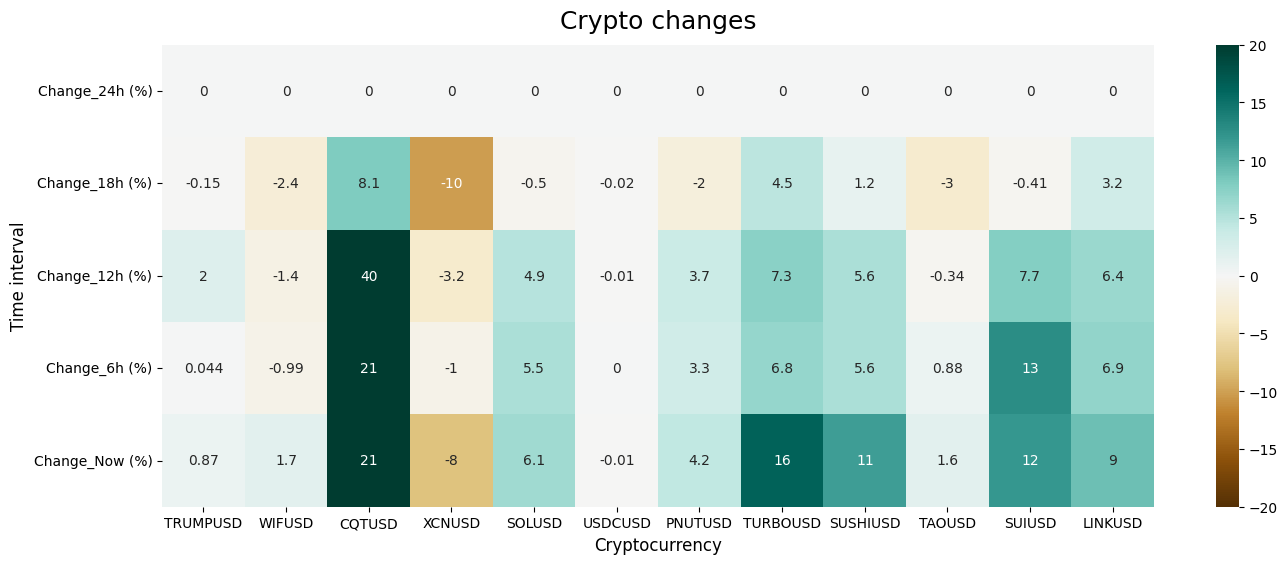

In [ ]:
df_prices = pd.DataFrame({
    'Pair': ['TRUMPUSD', 'WIFUSD', 'CQTUSD', 'XCNUSD', 'SOLUSD', 'USDCUSD', 'PNUTUSD', 'TURBOUSD', 'SUSHIUSD', 'TAOUSD', 'SUIUSD', 'LINKUSD'],
    'Change_24h (%)': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Change_18h (%)': [-0.146386, -2.399737, 8.064516, -10.161847, -0.501855, -0.019998, -1.960016, 4.541910, 1.181435, -2.972832, -0.414792, 3.248805],
    'Change_12h (%)': [2.034767, -1.356016, 40.322581, -3.236933, 4.883264, -0.009999, 3.724030, 7.348928, 5.569620, -0.335758, 7.738304, 6.443933],
    'Change_6h (%)': [0.043916, -0.994412, 20.967742, -1.034757, 5.511674, 0.000000, 3.253626, 6.803119, 5.569620, 0.877716, 12.810084, 6.908940],
    'Change_Now (%)': [0.867338, 1.692965, 20.967742, -7.959671, 6.118263, -0.009999, 4.233634, 16.276803, 11.476793, 1.611684, 11.993967, 9.028224]
})

df_prices_long = df_prices.set_index('Pair').T

plt.figure(figsize=(16, 6))
sns.heatmap(df_prices_long, annot=True, cmap='BrBG', vmin=-20, vmax=20)

plt.title('Crypto changes', fontsize=18, pad=12)
plt.xlabel('Cryptocurrency', fontsize=12)
plt.ylabel('Time interval', fontsize=12)
plt.show()

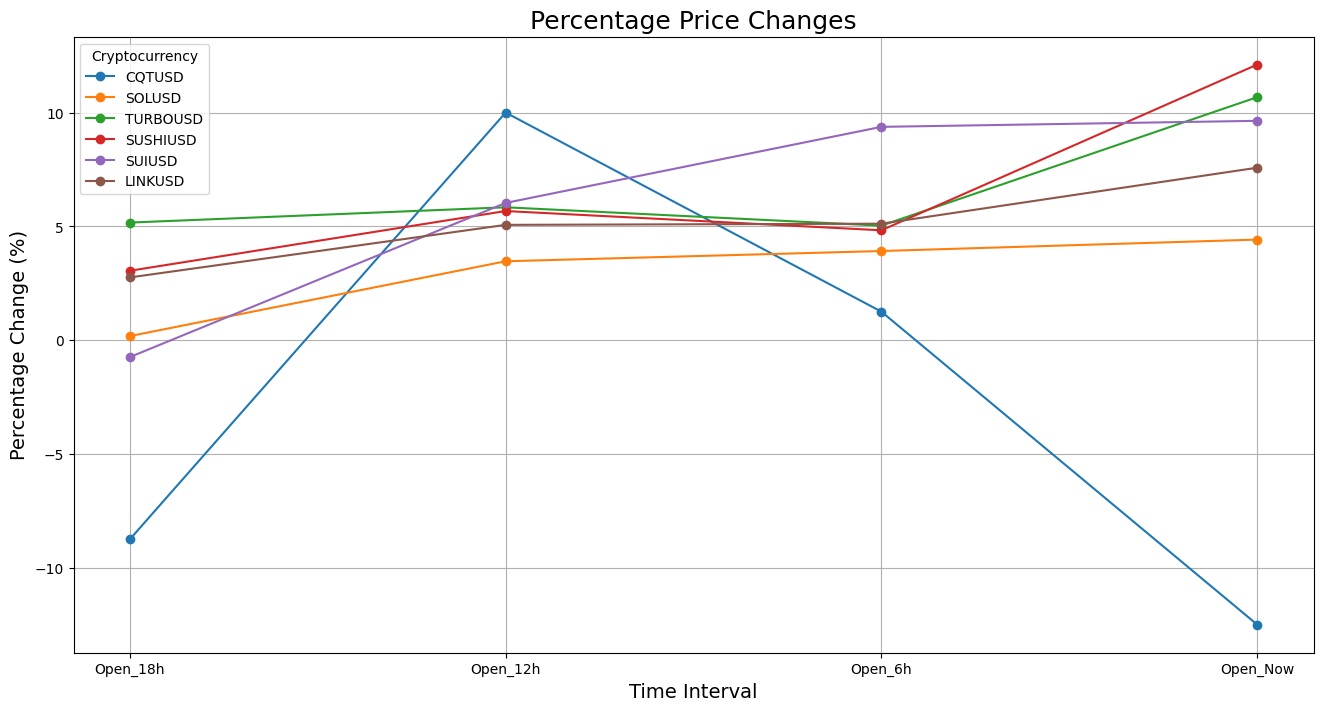

In [ ]:
cryptos = ['CQTUSD', 'SOLUSD', 'TURBOUSD', 'SUSHIUSD', 'SUIUSD', 'LINKUSD']
df_prices['Pair'] = df_prices.index
df_selected = df_prices[df_prices['Pair'].isin(cryptos)]

df_percent_changes = pd.DataFrame()

for crypto in cryptos:
    df_percent_changes[crypto] = (df_selected.loc[crypto, ['Open_18h', 'Open_12h', 'Open_6h', 'Open_Now']] - df_selected.loc[crypto, 'Open_24h']) / df_selected.loc[crypto, 'Open_24h'] * 100

df_percent_changes = df_percent_changes.T

plt.figure(figsize=(16, 8))
for crypto in cryptos:
    plt.plot(df_percent_changes.columns, df_percent_changes.loc[crypto], marker='o', label=crypto)

plt.title('Percentage Price Changes', fontsize=18)
plt.xlabel('Time Interval', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)
plt.legend(title='Cryptocurrency')
plt.grid(True)
plt.show()

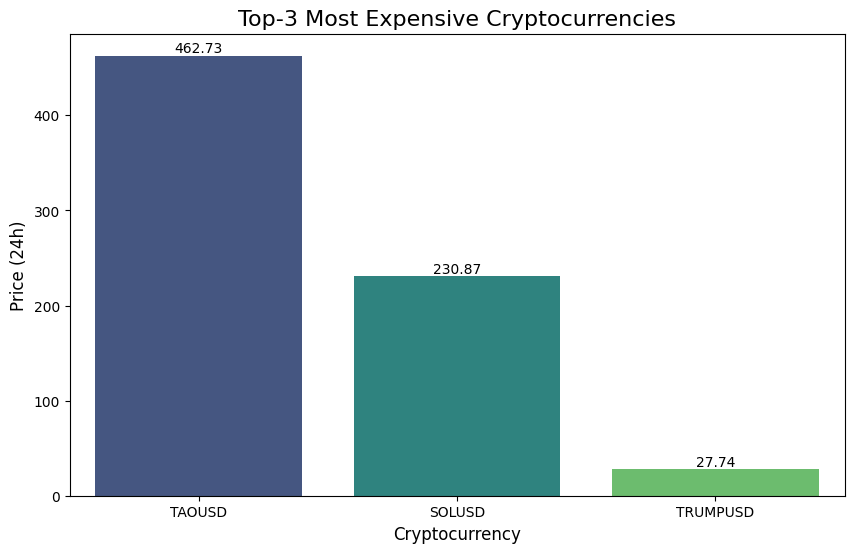

In [ ]:
top_3_expensive = df_prices.sort_values(by='Open_24h', ascending=False).head(3)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Pair', y='Open_24h', data=top_3_expensive, hue='Pair', palette='viridis', legend=False)

plt.title('Top-3 Most Expensive Cryptocurrencies', fontsize=16)
plt.xlabel('Cryptocurrency', fontsize=12)
plt.ylabel('Price (24h)', fontsize=12)

for i, v in enumerate(top_3_expensive['Open_24h']):
    ax.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()